# All

In [3]:
#importing the libraries

import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder



sc=StandardScaler()
oh = OneHotEncoder()
le=LabelEncoder()


In [4]:
# read data

df=pd.read_csv("/content/flightdata.csv")

df.head()


,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
0,2016,1,1,1,5,DL,N836DN,1399,10397,ATL,...,2143,2102.0,-41.0,0.0,0.0,0.0,338.0,295.0,2182.0,NaN
1,2016,1,1,1,5,DL,N964DN,1476,11433,DTW,...,1435,1439.0,4.0,0.0,0.0,0.0,110.0,115.0,528.0,NaN
2,2016,1,1,1,5,DL,N813DN,1597,10397,ATL,...,1215,1142.0,-33.0,0.0,0.0,0.0,335.0,300.0,2182.0,NaN
3,2016,1,1,1,5,DL,N587NW,1768,14747,SEA,...,1335,1345.0,10.0,0.0,0.0,0.0,196.0,205.0,1399.0,NaN
4,2016,1,1,1,5,DL,N836DN,1823,14747,SEA,...,607,615.0,8.0,0.0,0.0,0.0,247.0,259.0,1927.0,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11231 entries, 0 to 11230
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 11231 non-null  int64  
 1   QUARTER              11231 non-null  int64  
 2   MONTH                11231 non-null  int64  
 3   DAY_OF_MONTH         11231 non-null  int64  
 4   DAY_OF_WEEK          11231 non-null  int64  
 5   UNIQUE_CARRIER       11231 non-null  object 
 6   TAIL_NUM             11231 non-null  object 
 7   FL_NUM               11231 non-null  int64  
 8   ORIGIN_AIRPORT_ID    11231 non-null  int64  
 9   ORIGIN               11231 non-null  object 
 10  DEST_AIRPORT_ID      11231 non-null  int64  
 11  DEST                 11231 non-null  object 
 12  CRS_DEP_TIME         11231 non-null  int64  
 13  DEP_TIME             11124 non-null  float64
 14  DEP_DELAY            11124 non-null  float64
 15  DEP_DEL15            11124 non-null 

In [6]:
#Dropping the unnecessary columns
df=df[['FL_NUM','MONTH','DAY_OF_MONTH','DAY_OF_WEEK','ORIGIN','DEST','CRS_ARR_TIME','DEP_DEL15','ARR_DEL15']]

#filling the NULL values
df=df.fillna({'ARR_DEL15':1}) 
df=df.fillna({'DEP_DEL15':0})



In [7]:
# handling the time values

for index, row in df.iterrows():
    df.loc[index,'CRS_ARR_TIME']=math.floor(row['CRS_ARR_TIME']/100)


In [8]:
# Handling the categorical values

df['DEST']=le.fit_transform(df['DEST'])
df['ORIGIN']=le.fit_transform(df['ORIGIN'])


In [9]:

df['ORIGIN'].unique()

array([0, 1, 4, 3, 2])

In [10]:
#splitting the dependent and independent variables

x=df.iloc[:,0:8].values
y=df.iloc[:,8:9].values

In [11]:
x.shape

(11231, 8)

In [12]:
z=oh.fit_transform(x[:,4:5]).toarray()
t=oh.fit_transform(x[:,5:6]).toarray()

In [13]:
z

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [14]:
t

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.]])

In [15]:
x=np.delete(x,[4,5],axis=1)
x.shape

(11231, 6)

> ##  **Exploratory Data Analysis**




In [16]:
#Descriptive statistical
df.describe()

,FL_NUM,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_ARR_TIME,DEP_DEL15,ARR_DEL15
count,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000
mean,1334.325617,6.628973,15.790758,3.960199,1.837325,1.806607,15.067314,0.141483,0.139168
std,811.875227,3.354678,8.782056,1.995257,1.489464,1.496328,5.023534,0.348535,0.346138
min,7.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,624.000000,4.000000,8.000000,2.000000,0.000000,0.000000,11.000000,0.000000,0.000000
50%,1267.000000,7.000000,16.000000,4.000000,2.000000,2.000000,15.000000,0.000000,0.000000
75%,2032.000000,9.000000,23.000000,6.000000,3.000000,3.000000,19.000000,0.000000,0.000000
max,2853.000000,12.000000,31.000000,7.000000,4.000000,4.000000,23.000000,1.000000,1.000000


<ipython-input-17-be142484d282>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.MONTH)


<Axes: xlabel='MONTH', ylabel='Density'>

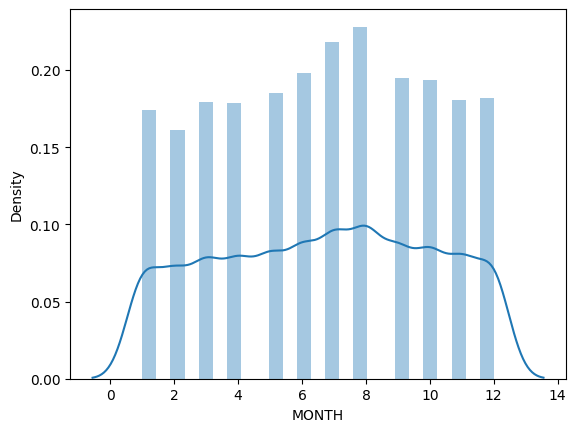

In [17]:
#univariate analysis
sns.distplot(df.MONTH)

<Axes: >

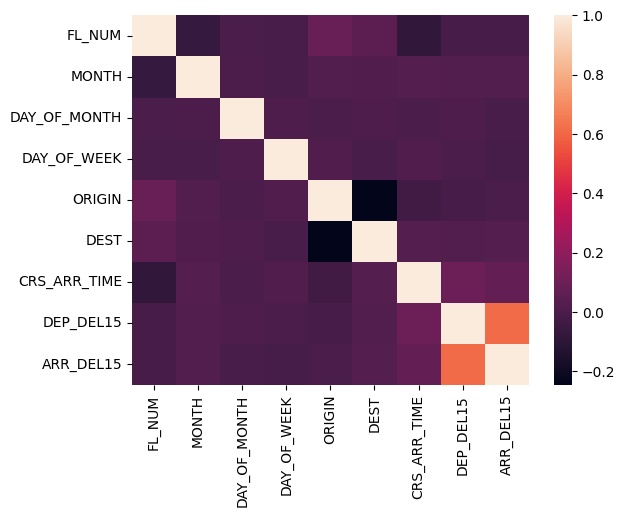

In [18]:
#multivariate analysis

sns.heatmap(df.corr())

In [19]:
# splitting test train data

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=10)

In [20]:
xtrain

array([[4.910e+02, 7.000e+00, 1.500e+01, 5.000e+00, 1.000e+01, 0.000e+00],
       [1.770e+02, 7.000e+00, 3.100e+01, 7.000e+00, 1.600e+01, 0.000e+00],
       [2.039e+03, 1.000e+00, 3.000e+00, 7.000e+00, 1.000e+01, 0.000e+00],
       ...,
       [6.290e+02, 2.000e+00, 2.100e+01, 7.000e+00, 1.100e+01, 0.000e+00],
       [7.000e+02, 8.000e+00, 2.500e+01, 4.000e+00, 1.500e+01, 0.000e+00],
       [7.480e+02, 2.000e+00, 1.800e+01, 4.000e+00, 1.200e+01, 0.000e+00]])

In [21]:
print("xtrain shape =",xtrain.shape)
print("xtest shape =",xtest.shape)
print("ytrain shape =",ytrain.shape)
print("ytest shape =",ytest.shape)

xtrain shape = (8984, 6)
xtest shape = (2247, 6)
ytrain shape = (8984, 1)
ytest shape = (2247, 1)


In [22]:
#scaling the datas
xtrain=sc.fit_transform(xtrain)
xtest=sc.transform(xtest)

In [23]:
# Decision tree Classifier model

from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier(random_state=0)


In [24]:
dtc.fit(xtrain,ytrain)

DecisionTreeClassifier(random_state=0)

In [25]:
ypred=dtc.predict(xtest)

In [28]:
accuracy_score(ytest,ypred)

0.8535825545171339

In [29]:
# Random forest model

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=20,criterion='entropy')

In [30]:
rfc.fit(xtrain,ytrain)

<ipython-input-30-6bd64776e0f5>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(xtrain,ytrain)


RandomForestClassifier(criterion='entropy', n_estimators=20)

In [31]:
ypred=rfc.predict(xtest)

In [32]:
df.head(50)

,FL_NUM,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_ARR_TIME,DEP_DEL15,ARR_DEL15
0,1399,1,1,5,0,4,21,0.0,0.0
1,1476,1,1,5,1,3,14,0.0,0.0
2,1597,1,1,5,0,4,12,0.0,0.0
3,1768,1,1,5,4,3,13,0.0,0.0
4,1823,1,1,5,4,1,6,0.0,0.0
5,1975,1,1,5,3,0,14,0.0,0.0
6,2074,1,2,6,0,3,19,0.0,0.0
7,2151,1,2,6,3,4,19,0.0,0.0
8,2221,1,2,6,3,4,13,0.0,0.0
9,2291,1,2,6,3,0,18,0.0,0.0


In [33]:
rfc.predict(sc.transform([[1699,1,4,1,14,1.0]]))

array([1.])

In [34]:
accuracy_score(ytest,ypred)

0.8958611481975968

In [35]:
# ANN Classification model(Artificial neural Network)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

annModel= Sequential()

In [36]:
annModel.add(Dense(30,activation='relu'))
annModel.add(Dense(128,activation='relu'))
annModel.add(Dense(64,activation='relu'))
annModel.add(Dense(32,activation='relu'))
annModel.add(Dense(1,activation='sigmoid'))

In [37]:
annModel.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [38]:
annModel.fit(xtrain,ytrain,batch_size=4,epochs=30,validation_split=0.2)

Epoch 1/30
1797/1797 [==============================] - 7s 3ms/step - loss: 0.2789 - accuracy: 0.9073 - val_loss: 0.2745 - val_accuracy: 0.9021
Epoch 2/30
1797/1797 [==============================] - 6s 3ms/step - loss: 0.2676 - accuracy: 0.9083 - val_loss: 0.2696 - val_accuracy: 0.9043
Epoch 3/30
1797/1797 [==============================] - 6s 3ms/step - loss: 0.2650 - accuracy: 0.9089 - val_loss: 0.2687 - val_accuracy: 0.9021
Epoch 4/30
1797/1797 [==============================] - 5s 3ms/step - loss: 0.2631 - accuracy: 0.9090 - val_loss: 0.2774 - val_accuracy: 0.9021
Epoch 5/30
1797/1797 [==============================] - 7s 4ms/step - loss: 0.2616 - accuracy: 0.9093 - val_loss: 0.2715 - val_accuracy: 0.9021
Epoch 6/30
1797/1797 [==============================] - 5s 3ms/step - loss: 0.2588 - accuracy: 0.9091 - val_loss: 0.2725 - val_accuracy: 0.9004
Epoch 7/30
1797/1797 [==============================] - 5s 3ms/step - loss: 0.2582 - accuracy: 0.9093 - val_loss: 0.2654 - val_accuracy:

In [39]:
annModel.save('flight.h5')

In [40]:
ypred=annModel.predict(sc.transform([[1699,1,4,1,14,1.0]]))
ypred

1/1 [==============================] - 0s 173ms/step


array([[0.5408947]], dtype=float32)

In [42]:
import pickle

In [43]:
pickle.dump(rfc,open('flightRFCmodel.pkl','wb'))

In [45]:
model=pickle.load(open('/content/flightRFCmodel.pkl','rb'))

In [46]:
model.predict(sc.transform([[1699,1,4,1,14,1.0]]))

array([1.])